In [1]:
import pandas as pd
df = pd.read_csv('./datasets/churn-bigml-prepared.csv')
X = df.drop('Churn', axis=1)
y = df['Churn']

In [2]:
from utils.config import Config
cfg = Config()
TEST_SIZE = cfg.config["model"]["test_size"]
RANDOM_STATE = cfg.config["model"]["random_state"]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from utils.plot import create_metrics, confusion_plot
from utils.model import gen_stacked_metrics, init_plot
from warnings import simplefilter
from sklearn.metrics._classification import UndefinedMetricWarning
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)
simplefilter(action='ignore', category=UndefinedMetricWarning)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.849091,0.554367,0.209524,0.133333,0.488889
1,Naive Bayes classifier,0.852727,0.691266,0.484076,0.460606,0.510067
2,Support vector machine,0.850000,0.500000,0.000000,0.000000,0.000000
3,Logistic Regression,0.850909,0.547950,0.188119,0.115152,0.513514
4,Decision tree,0.875455,0.694652,0.512456,0.436364,0.620690
5,Random forest,0.887273,0.691622,0.523077,0.412121,0.715789
6,Linear discriminant analysis,0.858182,0.592157,0.309735,0.212121,0.573770


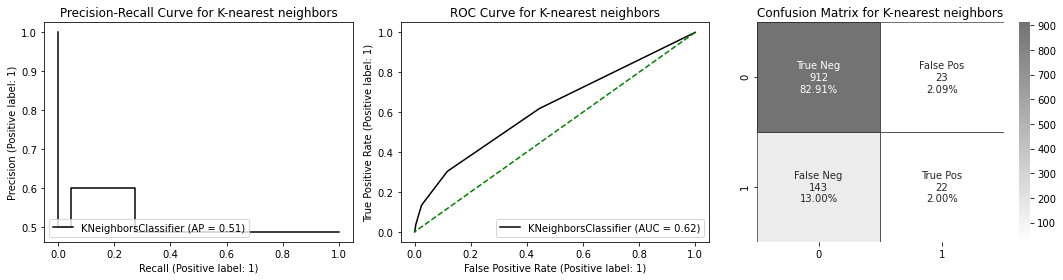

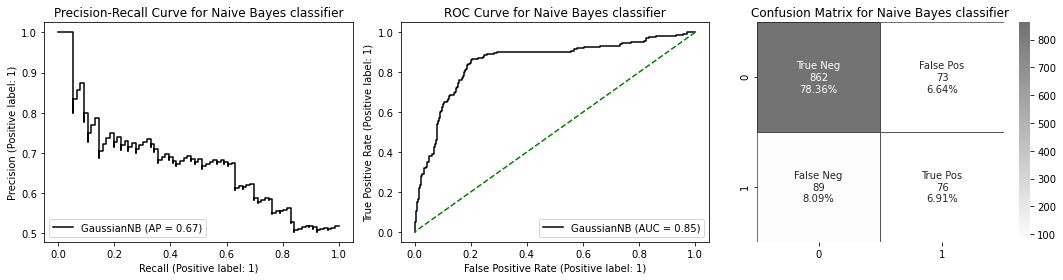

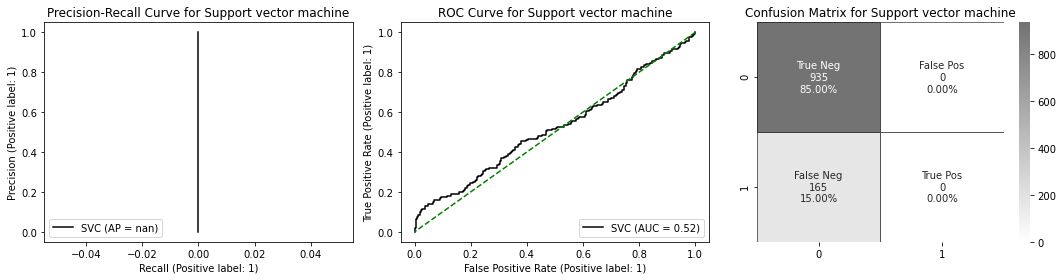

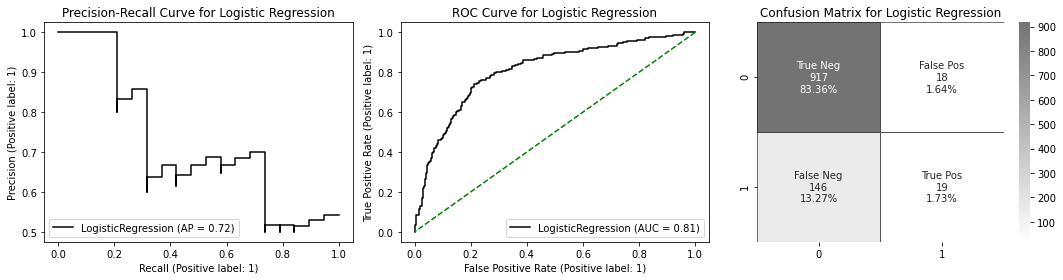

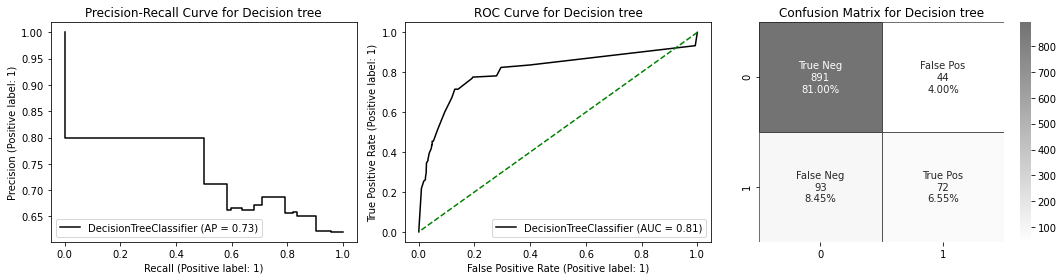

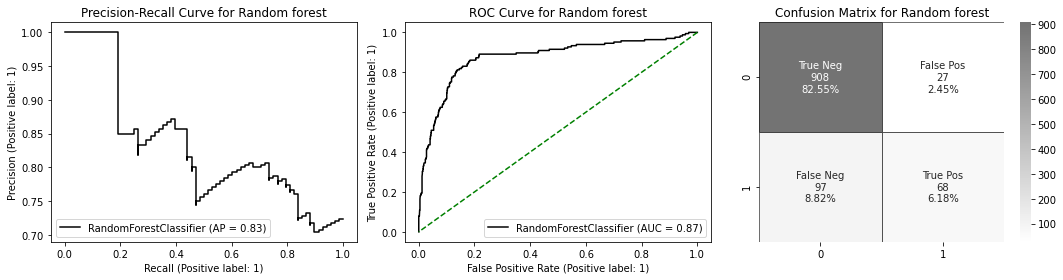

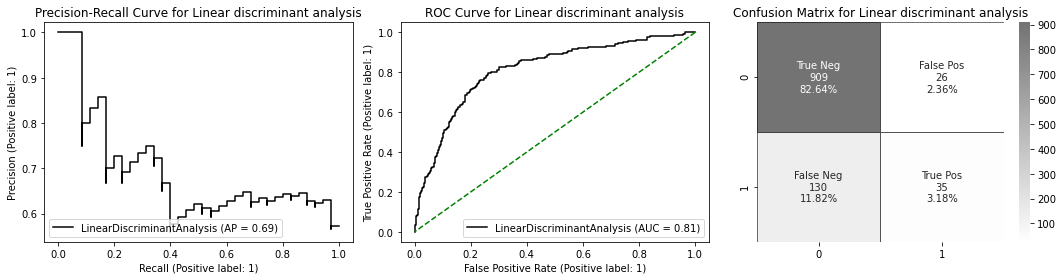

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
create_metrics(X_train, X_valid, y_train, y_valid)

In [5]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_resampled, y_resampled = ros.fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

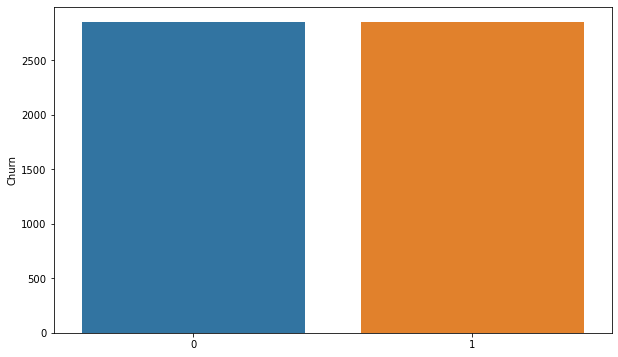

In [6]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts())

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled, y_resampled, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.765019,0.767101,0.783333,0.867535,0.714030
1,Naive Bayes classifier,0.774056,0.772867,0.756168,0.715527,0.801703
2,Support vector machine,0.616162,0.615313,0.594382,0.574376,0.615832
3,Logistic Regression,0.746943,0.746900,0.742424,0.744843,0.740022
4,Decision tree,0.830409,0.830921,0.831662,0.855592,0.809035
5,Random forest,0.832004,0.832616,0.834034,0.862106,0.807731
6,Linear discriminant analysis,0.746411,0.746203,0.739771,0.736156,0.743421


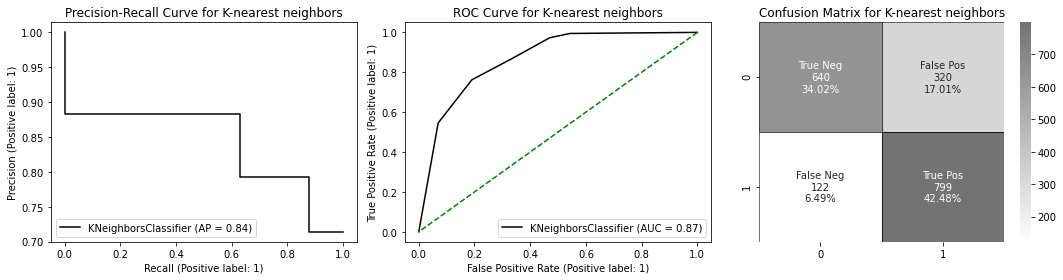

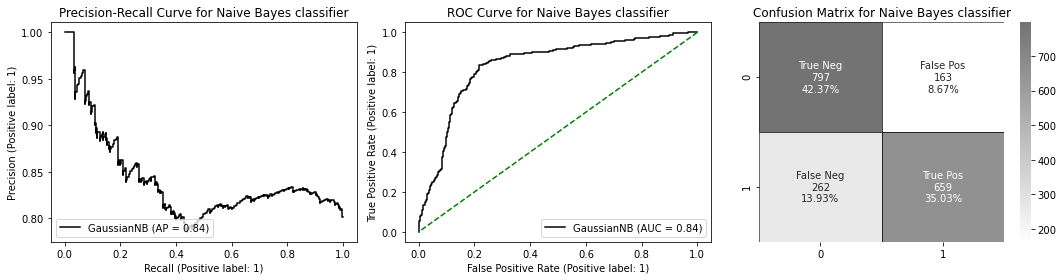

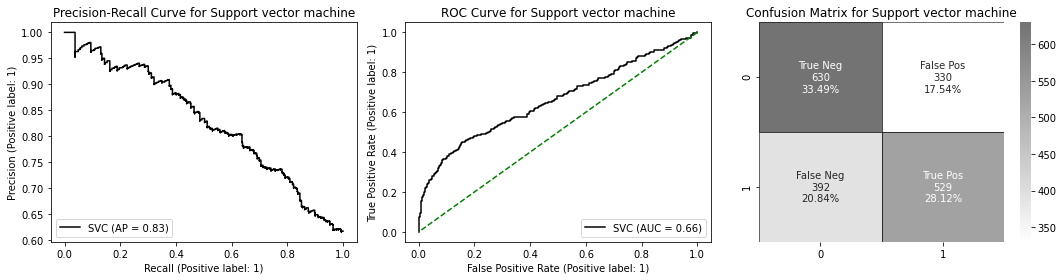

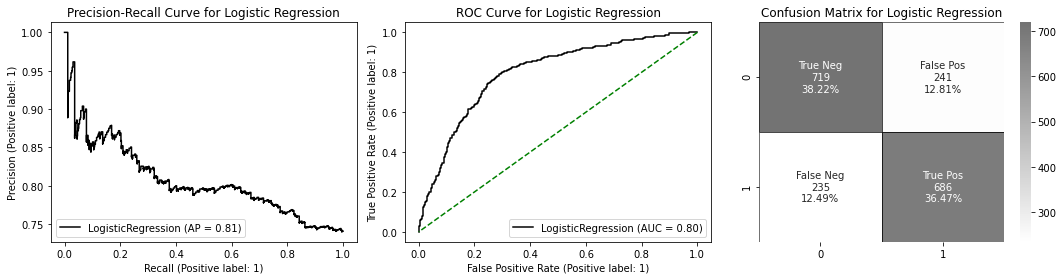

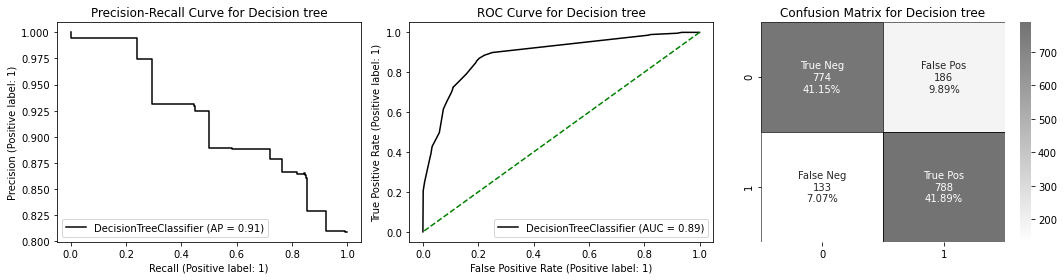

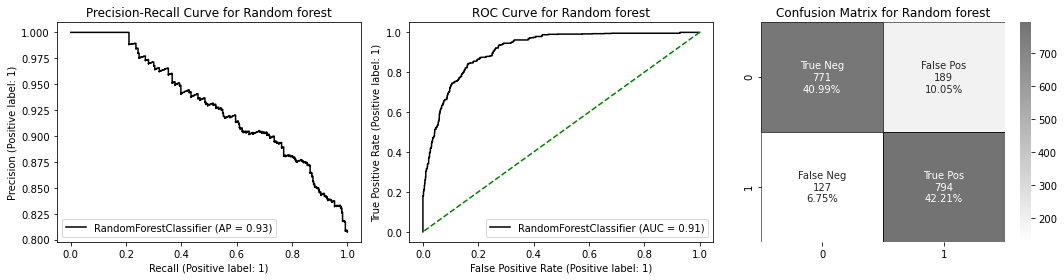

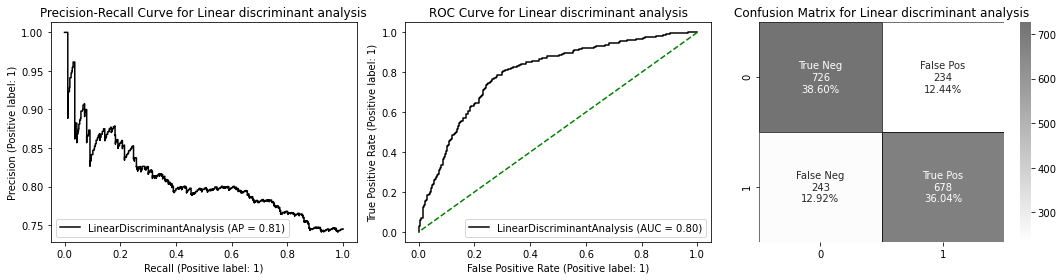

In [8]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [9]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

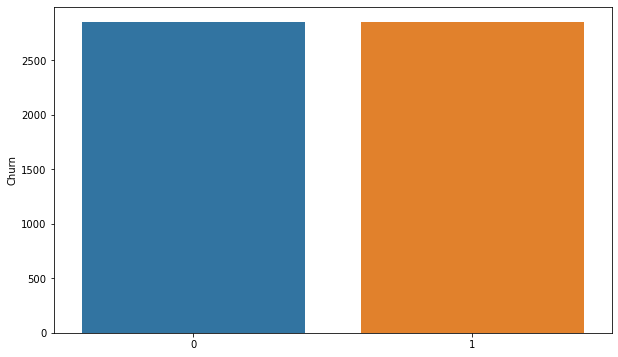

In [10]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_resampled_smote.value_counts().index, y=y_resampled_smote.value_counts())

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled, y_resampled, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.765019,0.767101,0.783333,0.867535,0.714030
1,Naive Bayes classifier,0.774056,0.772867,0.756168,0.715527,0.801703
2,Support vector machine,0.616162,0.615313,0.594382,0.574376,0.615832
3,Logistic Regression,0.746943,0.746900,0.742424,0.744843,0.740022
4,Decision tree,0.830409,0.830921,0.831662,0.855592,0.809035
5,Random forest,0.832004,0.832616,0.834034,0.862106,0.807731
6,Linear discriminant analysis,0.746411,0.746203,0.739771,0.736156,0.743421


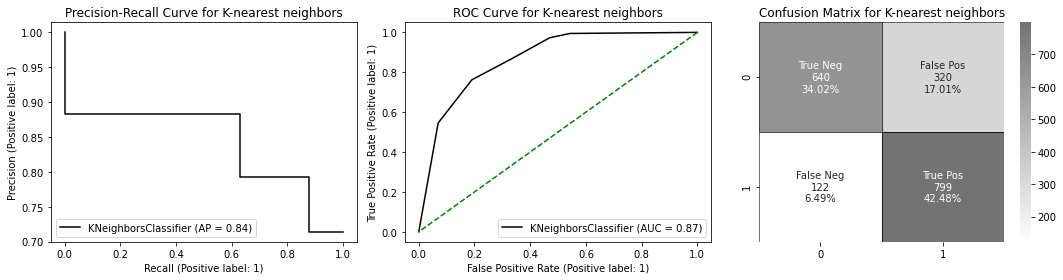

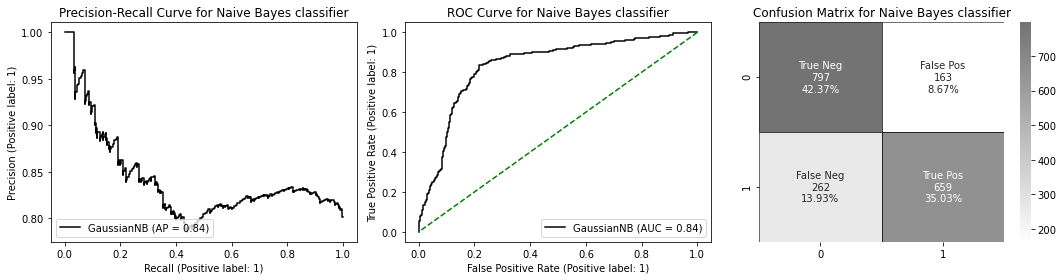

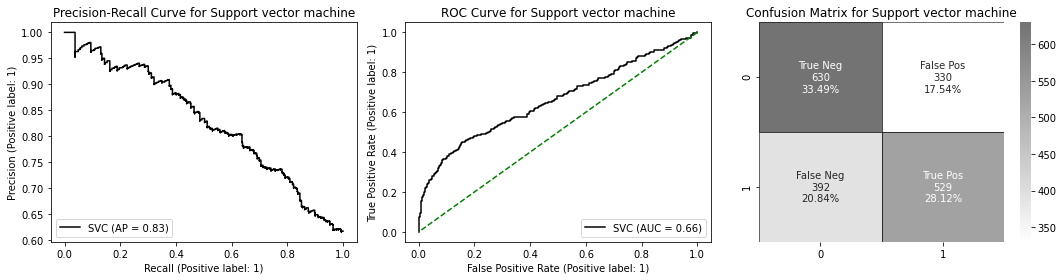

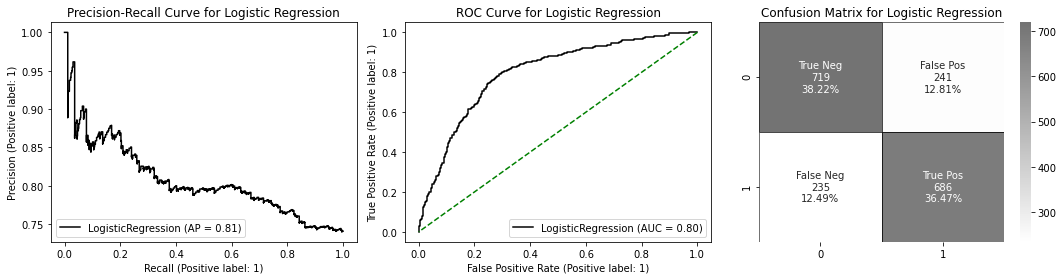

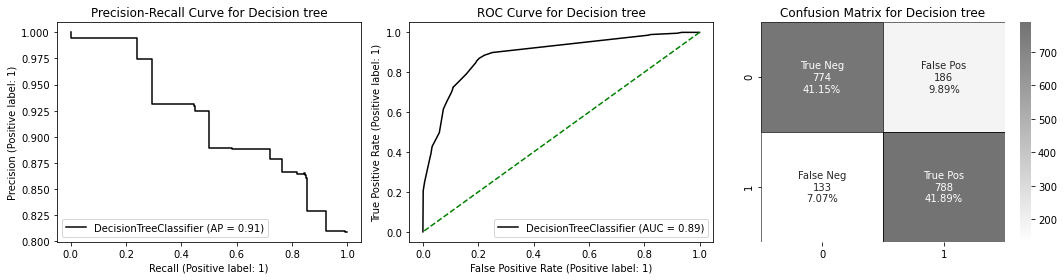

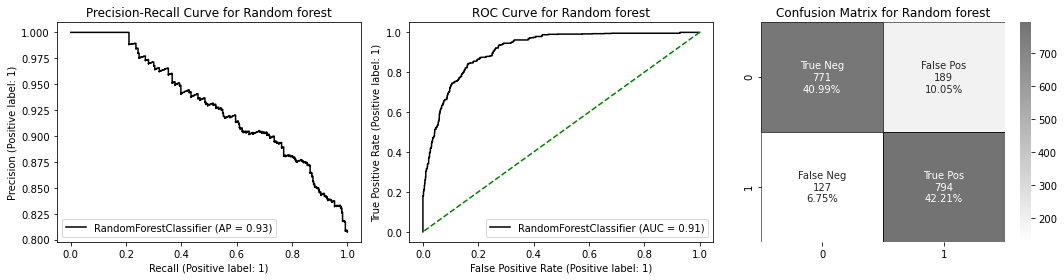

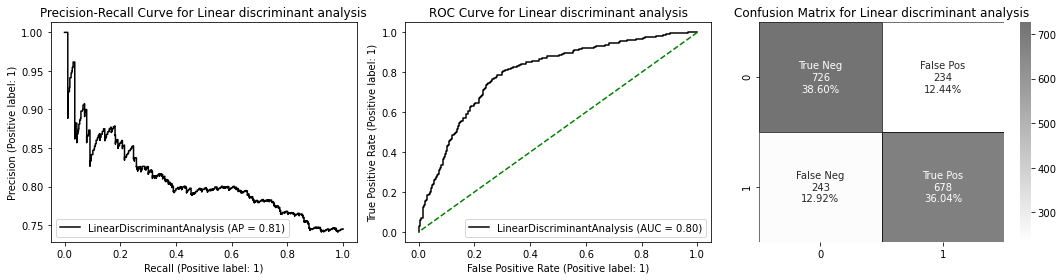

In [12]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [13]:
X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X, y)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled_adasyn, y_resampled_adasyn, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.730542,0.733828,0.743878,0.815436,0.683865
1,Naive Bayes classifier,0.696189,0.692795,0.657799,0.608501,0.715789
2,Support vector machine,0.581320,0.581420,0.572368,0.583893,0.561290
3,Logistic Regression,0.652711,0.652904,0.645091,0.657718,0.632939
4,Decision tree,0.730005,0.726342,0.693106,0.635347,0.762416
5,Random forest,0.728932,0.727604,0.710933,0.694631,0.728019
6,Linear discriminant analysis,0.655931,0.656000,0.647221,0.657718,0.637053


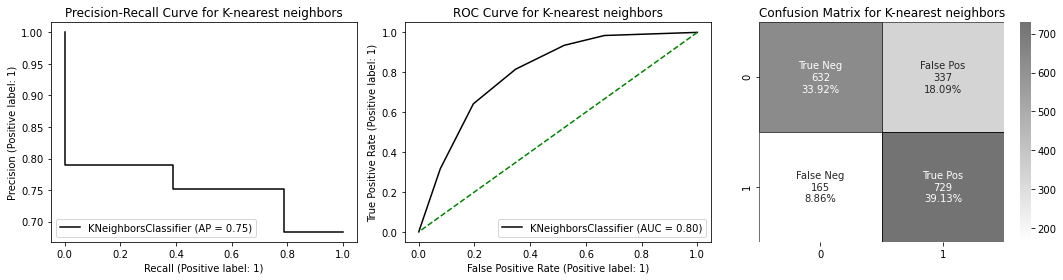

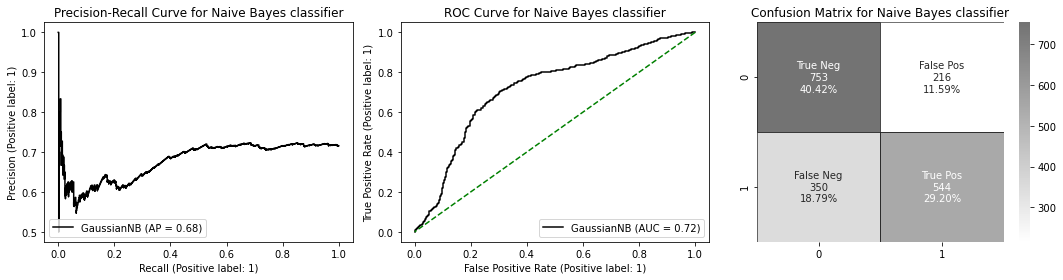

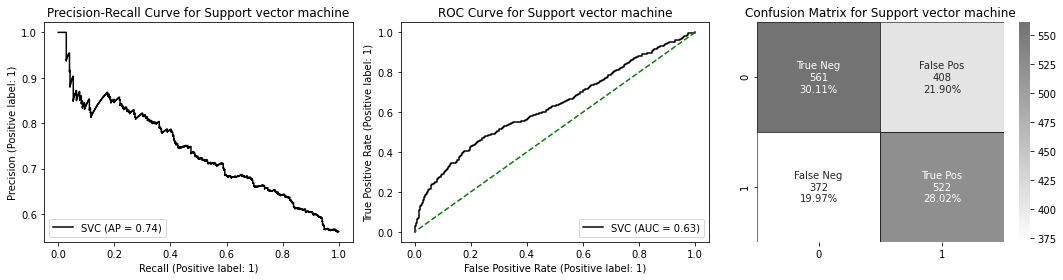

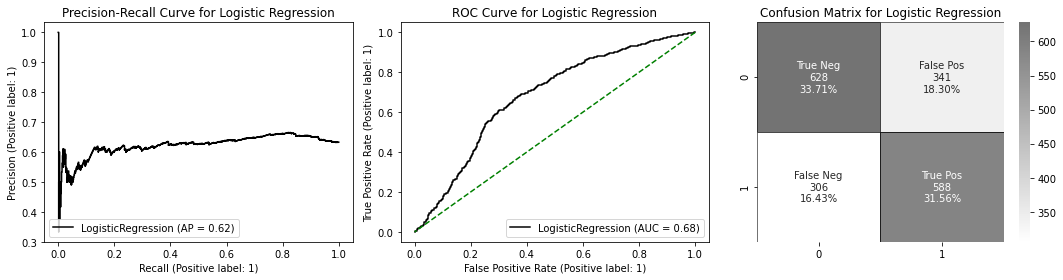

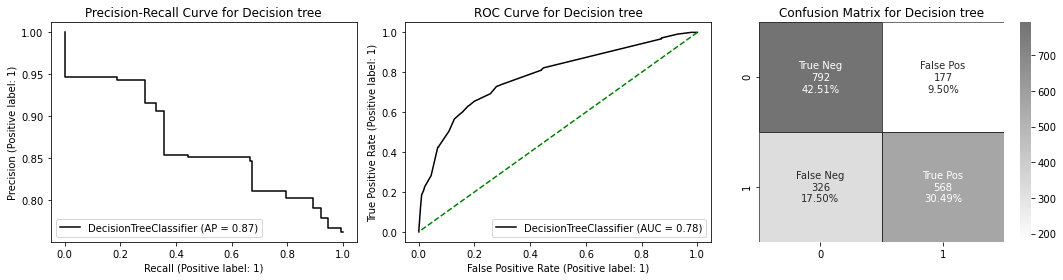

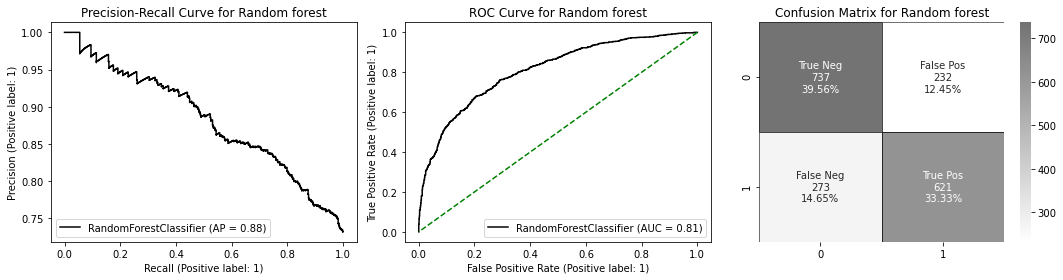

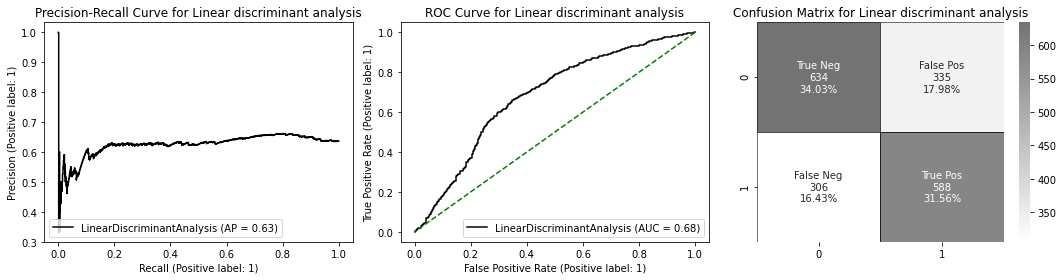

In [15]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [16]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_u_resampled, y_u_resampled = rus.fit_resample(X, y)

<AxesSubplot:ylabel='Churn'>

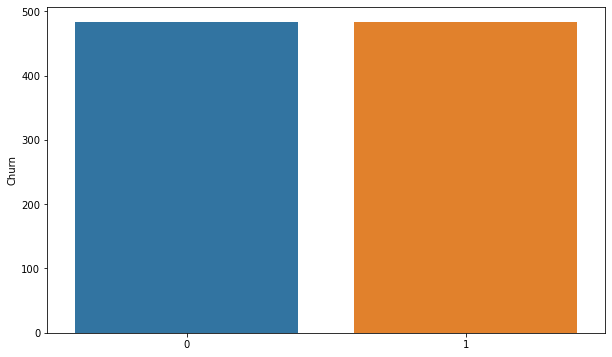

In [17]:
plt.figure(figsize = (10,6))
sns.barplot(x=y_u_resampled.value_counts().index, y=y_u_resampled.value_counts())

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_u_resampled, y_u_resampled, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.583072,0.583006,0.577778,0.575949,0.579618
1,Naive Bayes classifier,0.733542,0.732428,0.695341,0.613924,0.801653
2,Support vector machine,0.523511,0.523292,0.509677,0.500000,0.519737
3,Logistic Regression,0.721003,0.721067,0.721003,0.727848,0.714286
4,Decision tree,0.783699,0.783061,0.766102,0.715190,0.824818
5,Random forest,0.793103,0.793498,0.800000,0.835443,0.767442
6,Linear discriminant analysis,0.705329,0.705185,0.698718,0.689873,0.707792


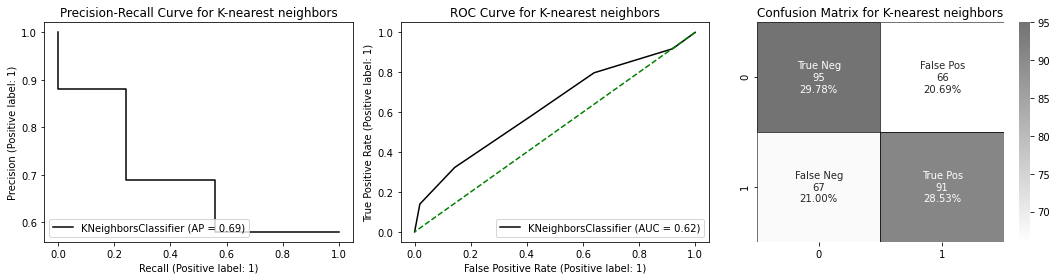

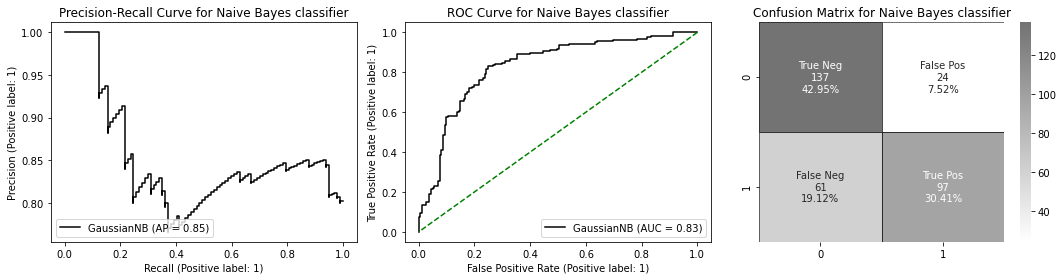

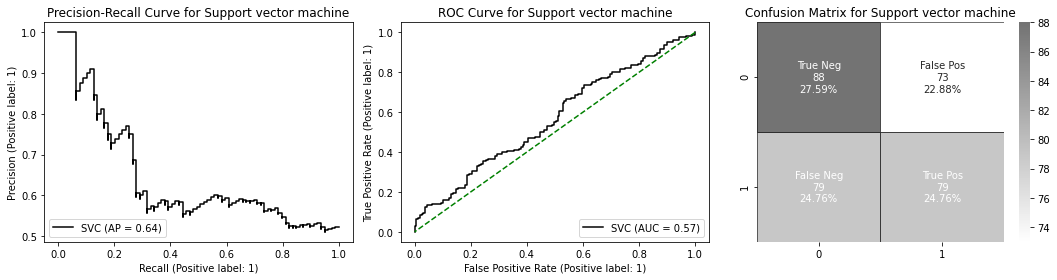

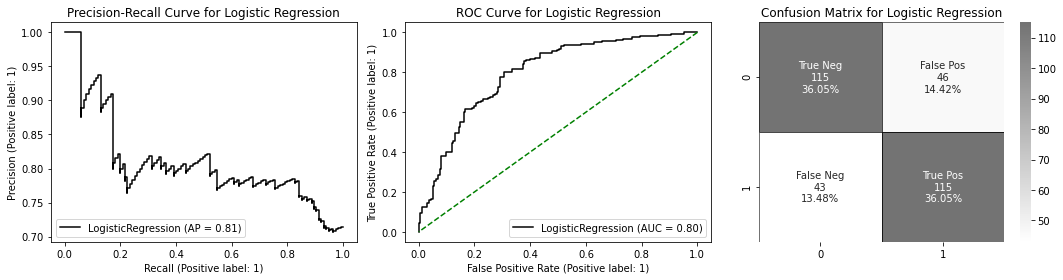

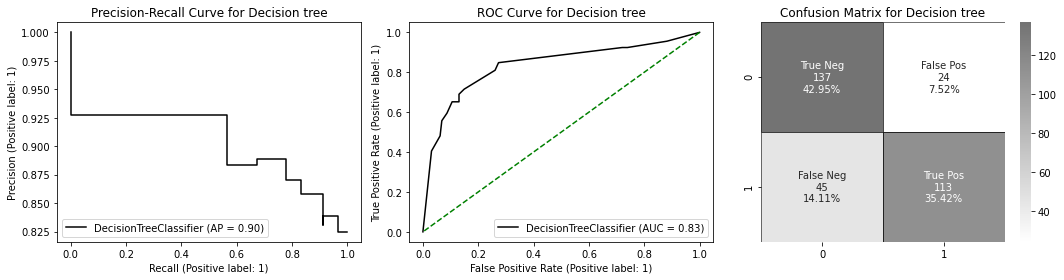

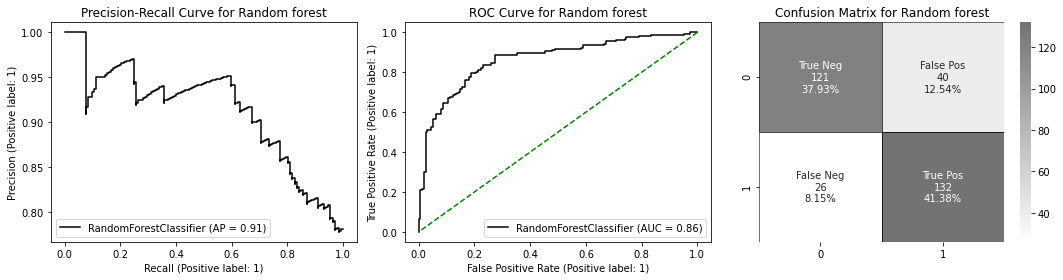

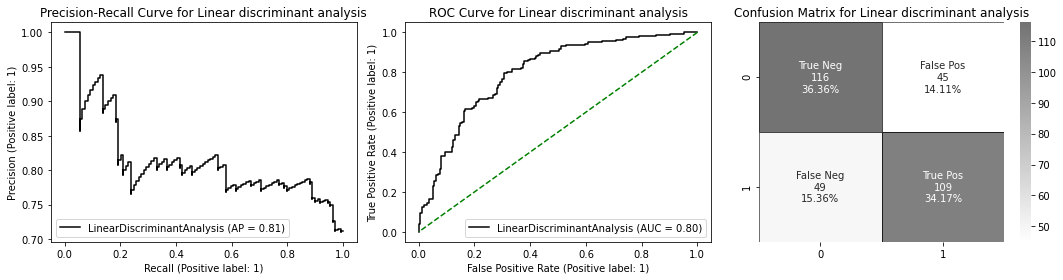

In [19]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [20]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=RANDOM_STATE)
X_c_resampled, y_c_resampled = cc.fit_resample(X, y)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_c_resampled, y_c_resampled, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.539185,0.539292,0.542056,0.550633,0.533742
1,Naive Bayes classifier,0.780564,0.778717,0.724409,0.582278,0.958333
2,Support vector machine,0.567398,0.567832,0.584337,0.613924,0.557471
3,Logistic Regression,0.818182,0.817517,0.802721,0.746835,0.867647
4,Decision tree,0.802508,0.801576,0.778947,0.702532,0.874016
5,Random forest,0.840125,0.840082,0.838095,0.835443,0.840764
6,Linear discriminant analysis,0.821317,0.820446,0.801394,0.727848,0.891473


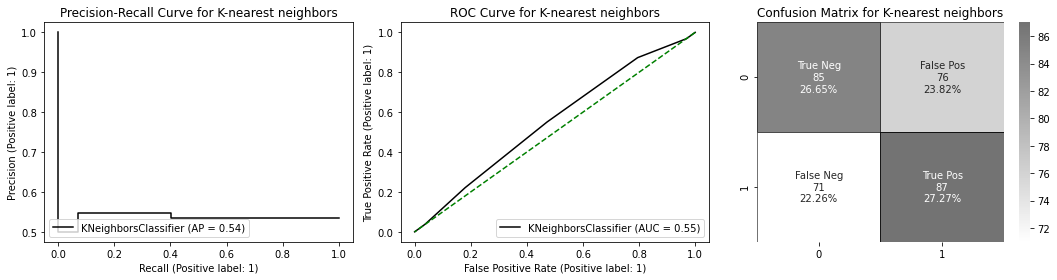

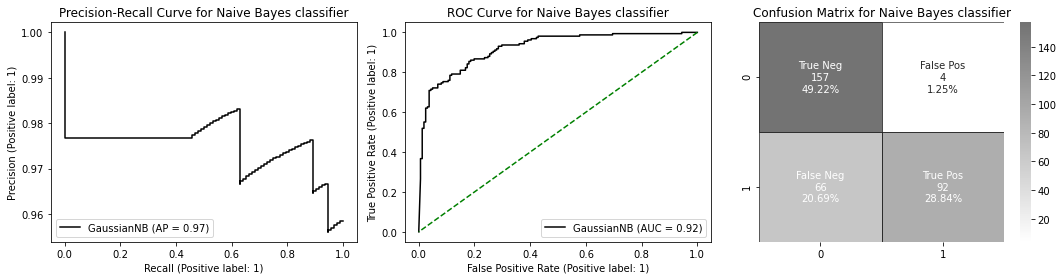

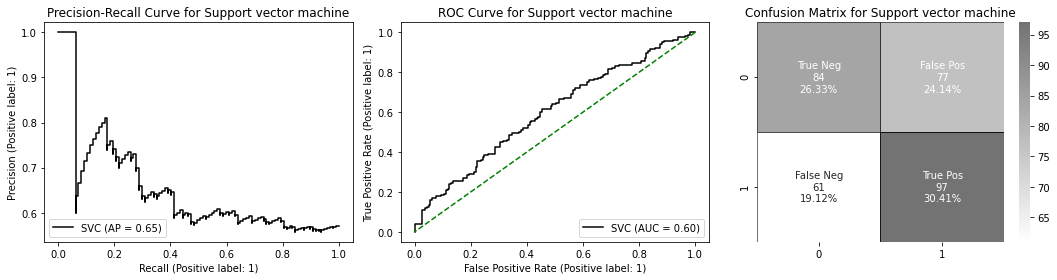

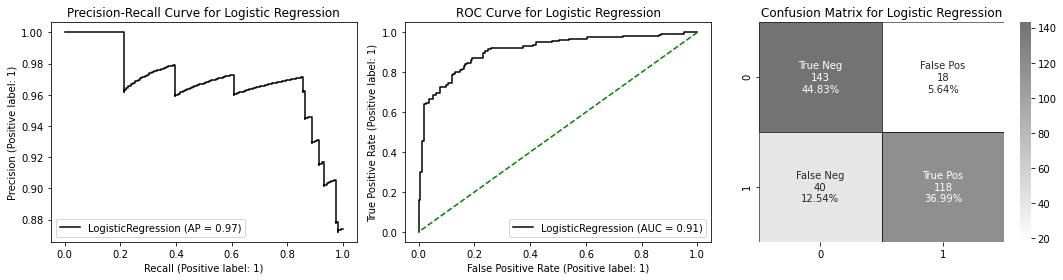

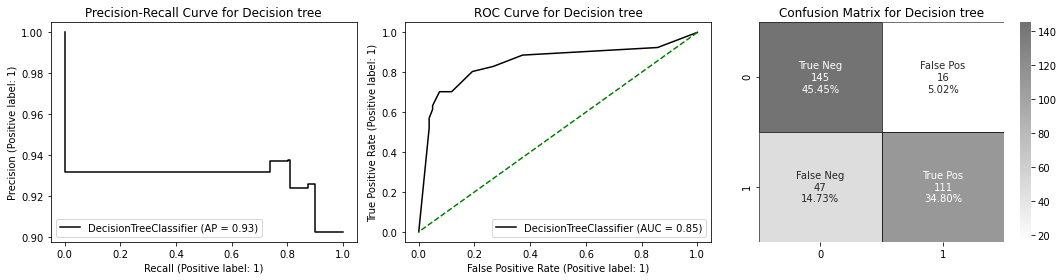

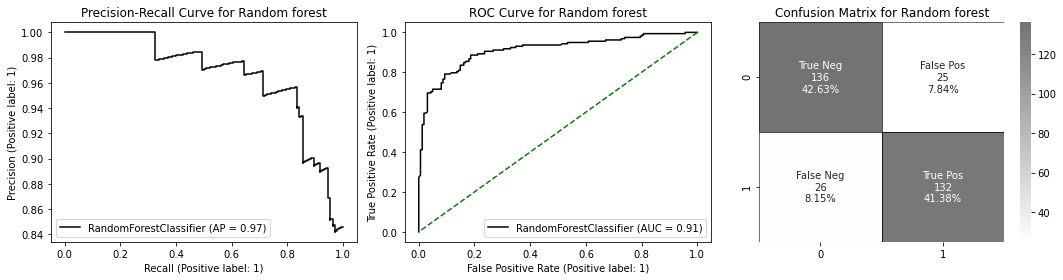

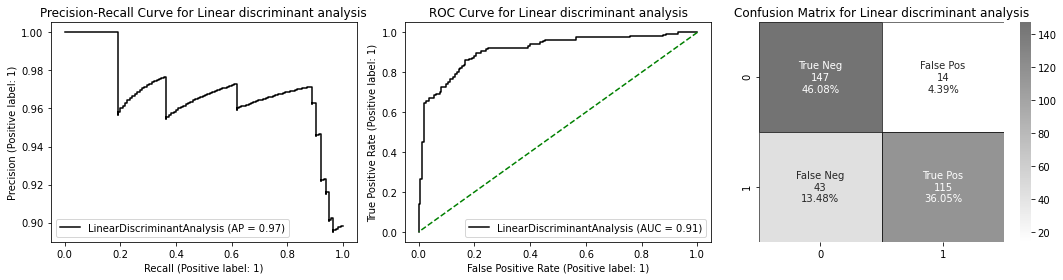

In [22]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [23]:
from imblearn.under_sampling import TomekLinks 
tl = TomekLinks()
X_tl_resampled, y_tl_resampled = tl.fit_resample(X, y)

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_tl_resampled, y_tl_resampled, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.859496,0.602852,0.337900,0.229814,0.637931
1,Naive Bayes classifier,0.854651,0.713901,0.522293,0.509317,0.535948
2,Support vector machine,0.843992,0.500000,0.000000,0.000000,0.000000
3,Logistic Regression,0.849806,0.564201,0.236453,0.149068,0.571429
4,Decision tree,0.893411,0.703953,0.556452,0.428571,0.793103
5,Random forest,0.890504,0.714888,0.567050,0.459627,0.740000
6,Linear discriminant analysis,0.851744,0.600791,0.331878,0.236025,0.558824


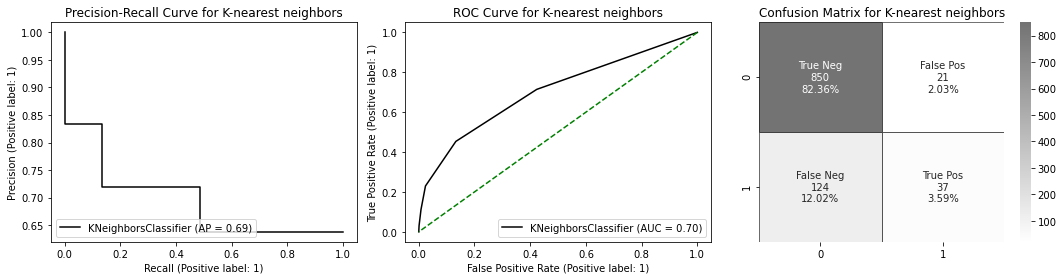

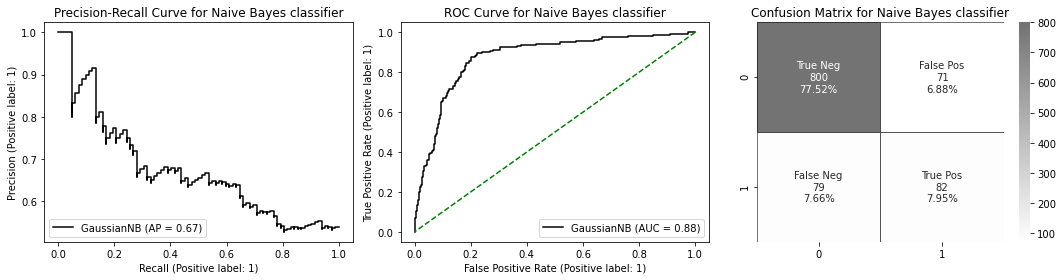

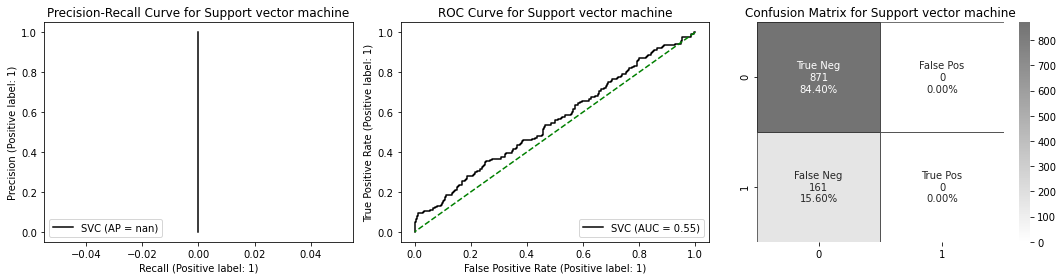

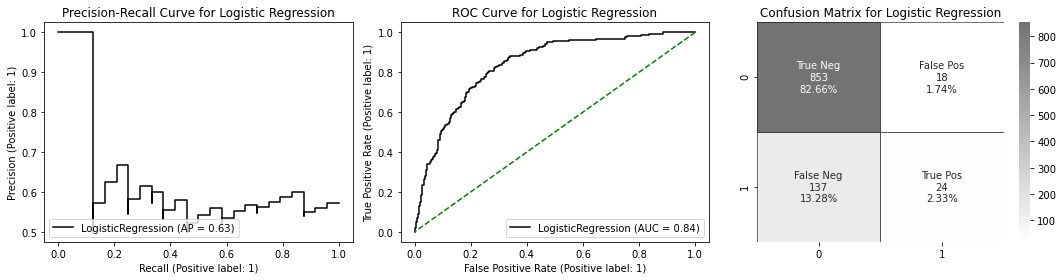

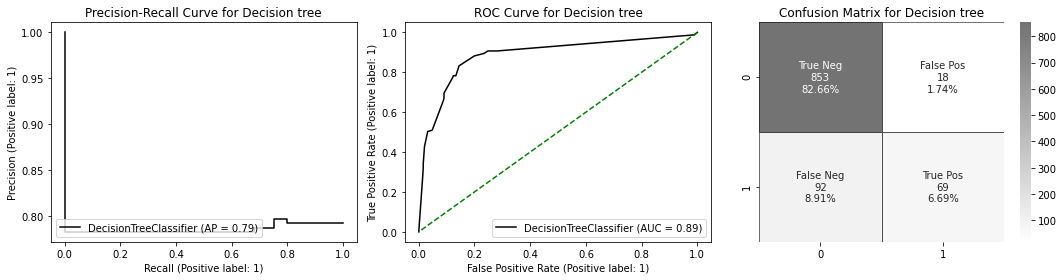

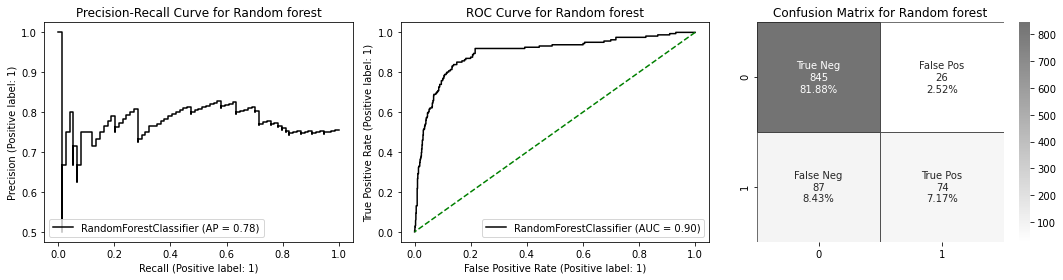

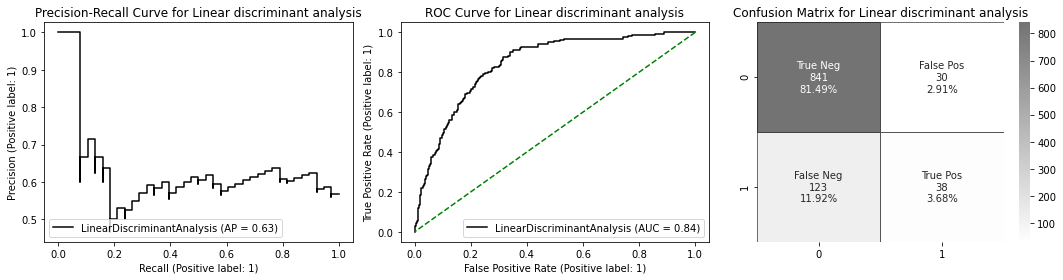

In [25]:
create_metrics(X_train, X_valid, y_train, y_valid)

In [26]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=RANDOM_STATE)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X, y)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_resampled_smote_tomek, y_resampled_smote_tomek, test_size=TEST_SIZE, random_state=RANDOM_STATE)

,classifier,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
0,K-nearest neighbors,0.777126,0.776344,0.794816,0.854820,0.742684
1,Naive Bayes classifier,0.737243,0.737767,0.724816,0.685250,0.769231
2,Support vector machine,0.631672,0.631951,0.623501,0.603949,0.644362
3,Logistic Regression,0.690909,0.690943,0.691993,0.687573,0.696471
4,Decision tree,0.770674,0.771219,0.759385,0.716609,0.807592
5,Random forest,0.770674,0.771336,0.756386,0.704994,0.815860
6,Linear discriminant analysis,0.690909,0.690931,0.692353,0.688734,0.696009


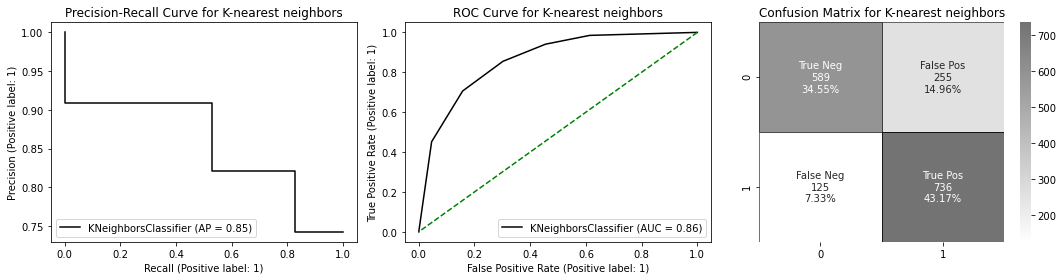

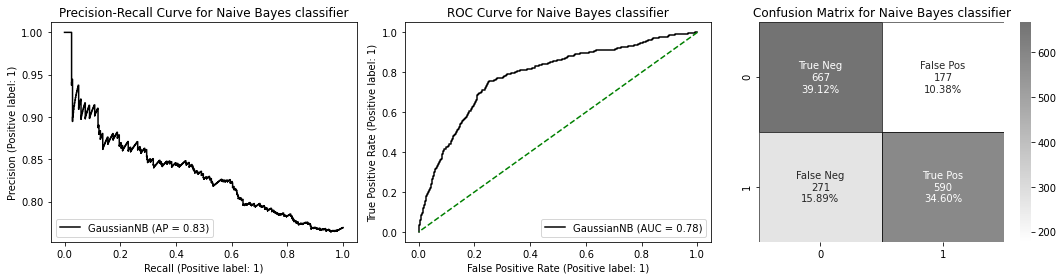

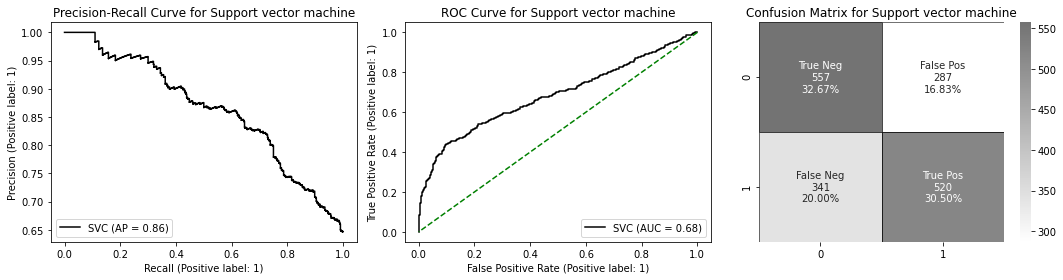

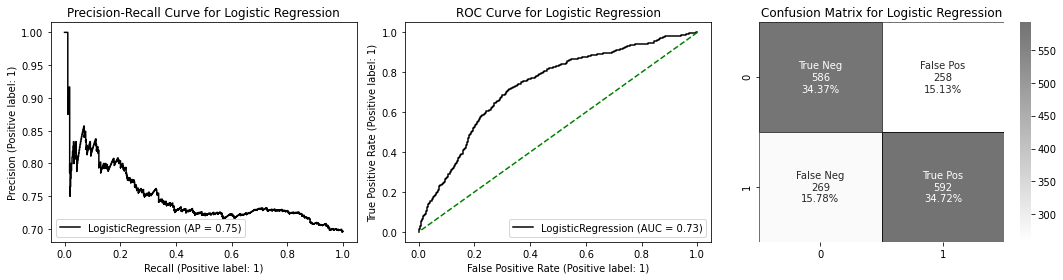

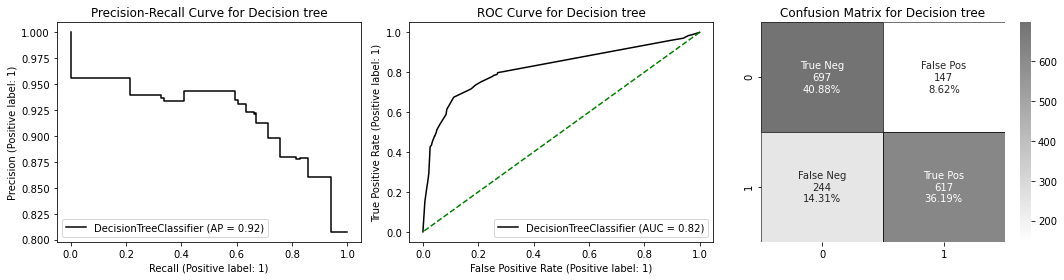

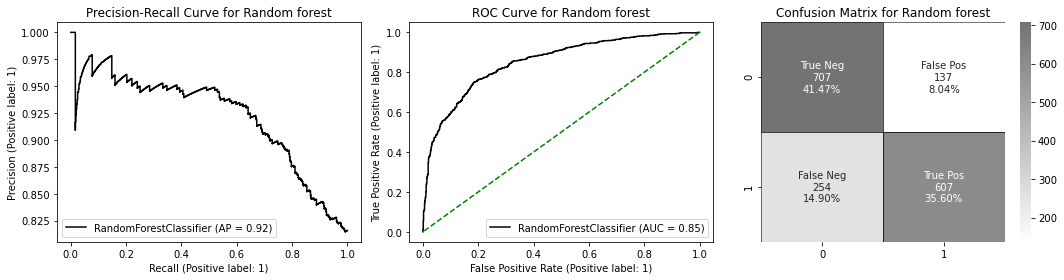

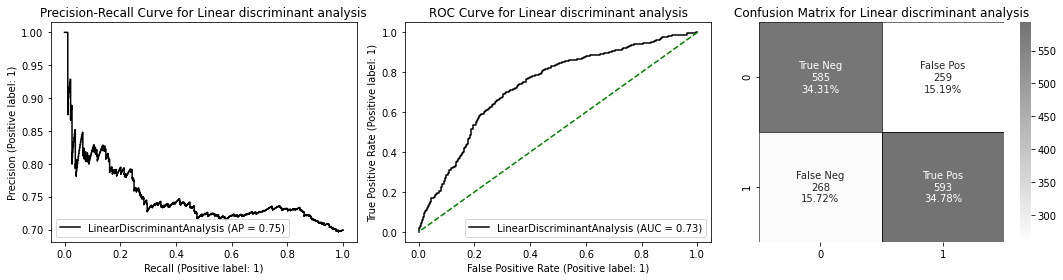

In [28]:
create_metrics(X_train, X_valid, y_train, y_valid)

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Bagging Classifier,0.865455,0.671301,0.467626,0.393939,0.575221


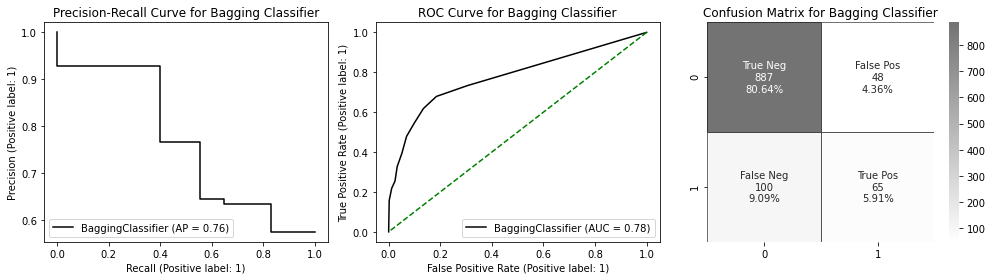

In [29]:
from sklearn.ensemble import BaggingClassifier


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


reg = BaggingClassifier()
cls_name = 'Bagging Classifier'

regmodel = reg.fit(X_train, y_train)
y_pred = reg.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Easy Ensemble Classifier,0.839091,0.822995,0.598639,0.8,0.478261


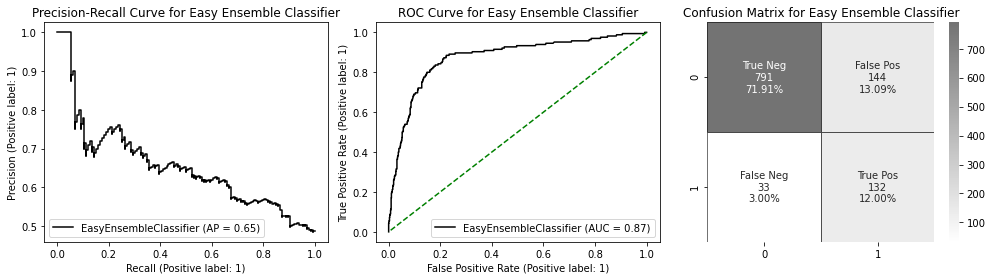

In [30]:
from imblearn.ensemble import EasyEnsembleClassifier

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

stacked_metrics={}

eec = EasyEnsembleClassifier()
cls_name = 'Easy Ensemble Classifier'

regmodel = eec.fit(X_train, y_train)
y_pred = eec.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,Ada Boost Classifier,0.866364,0.624421,0.384937,0.278788,0.621622


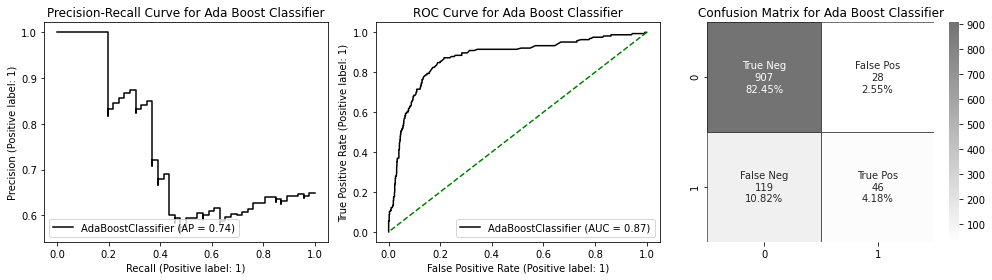

In [31]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

abc = AdaBoostClassifier()
cls_name = 'Ada Boost Classifier'

regmodel = abc.fit(X_train, y_train)
y_pred = abc.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])

,classifier,accuracy_score,ROC AUC score,f1_score,recall_score,precision_score
0,SMOTE Boost,0.867273,0.729768,0.546584,0.533333,0.56051


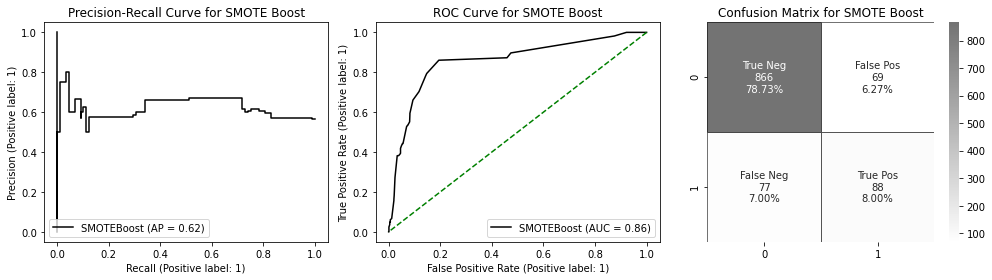

In [32]:
from utils.smote import SMOTEBoost
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

sb = SMOTEBoost()
cls_name = 'SMOTE Boost'

regmodel = sb.fit(X_train, y_train)
y_pred = sb.predict(X_valid)

init_plot(cls_name, regmodel, X_valid, y_valid, y_pred)

stacked_metrics = gen_stacked_metrics(cls_name, y_valid, y_pred)
    
plt.tight_layout()

pd.DataFrame([stacked_metrics])